In [1]:
from biosignal_and_tetris_result_service import get_player_results

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.max_columns', None)
print(tf.__version__)

%run biosignal_and_tetris_result_service.ipynb

2.2.0


In [2]:
results = get_player_results()

df = results['E03_R02_S01'][0]['p1']

X = df.drop(['Czas','Draw','Lose','Win'],axis=1).values
y = df[['Win', 'Lose', 'Draw']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
X_train = X_train.reshape(-1, 1, 5)
X_test  = X_test.reshape(-1, 1, 5)
y_train = y_train.reshape(-1, 1, 3)
y_test = y_test.reshape(-1, 1, 3)

In [35]:
model = Sequential()

model.add(LSTM(64, input_shape=(None,5), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(3, activation='softmax', name='output'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
21/22 [===========================>..] - ETA: 0s - loss: 1.0831 - accuracy: 0.5385WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f8d23bb45f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

22/22 [==============================] - 0s 17ms/step - loss: 0.3298 - accuracy: 0.8286 - val_loss: 0.3368 - val_accuracy: 0.8242
Epoch 46/100
22/22 [==============================] - 0s 20ms/step - loss: 0.3270 - accuracy: 0.8339 - val_loss: 0.3304 - val_accuracy: 0.8280
Epoch 47/100
22/22 [==============================] - 0s 17ms/step - loss: 0.3224 - accuracy: 0.8344 - val_loss: 0.3443 - val_accuracy: 0.8154
Epoch 48/100
22/22 [==============================] - 0s 16ms/step - loss: 0.3238 - accuracy: 0.8366 - val_loss: 0.3188 - val_accuracy: 0.8274
Epoch 49/100
22/22 [==============================] - 0s 18ms/step - loss: 0.3137 - accuracy: 0.8405 - val_loss: 0.3181 - val_accuracy: 0.8270
Epoch 50/100
22/22 [==============================] - 0s 15ms/step - loss: 0.3126 - accuracy: 0.8379 - val_loss: 0.3126 - val_accuracy: 0.8448
Epoch 51/100
22/22 [==============================] - 0s 15ms/step - loss: 0.3145 - accuracy: 0.8403 - val_loss: 0.3140 - val_accuracy: 0.8270
Epoch 52/100

In [36]:
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

149/149 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9572
Final test set loss: 0.108148
Final test set accuracy: 0.957161


In [18]:
losses = pd.DataFrame(history.history)

<AxesSubplot:>

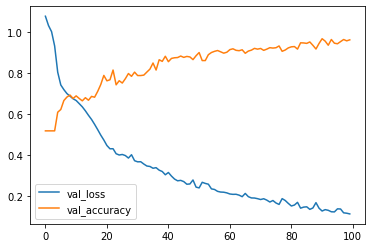

In [8]:
losses[['val_loss','val_accuracy']].plot()

<AxesSubplot:>

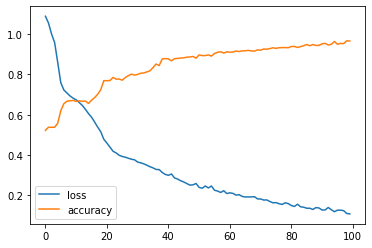

In [9]:
losses[['loss','accuracy']].plot()

<AxesSubplot:>

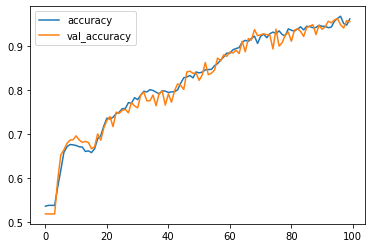

In [19]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

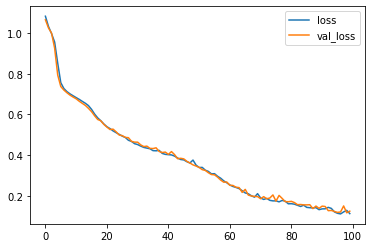

In [20]:
losses[['loss','val_loss']].plot()

In [ ]:
model = load_model('model_01_07_84acc.h5', compile=False)

In [12]:
y_predicted = model.predict(X_test)
confusion = confusion_matrix(y_test.reshape(-1, 3).argmax(axis=1), y_predicted.reshape(-1, 3).argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Confusion Matrix

[[1139   72   36]
 [  31 2439    0]
 [  31    9 1005]]
